# Question2
In this part you will create an adaboost classifier based on linear SVM to classify the
dataset in Question 2.
1. Load and plot ​‘classA.csv’ and ​‘classB.csv’ and visualize them on the same
figure.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import RepeatedKFold

Load and plot ​‘classA.csv’ and ​‘classB.csv’ and visualize them on the same
figure

[-1  1]


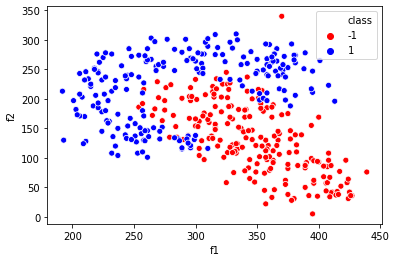

In [2]:
'''
class_a :- pandas data frame for class a 
class_b :- pandas data frame for class b
df :- data frame for both classes 
'''
df_class_a = pd.read_csv("../assignment3_questions/classA.csv", names=["f1", "f2"])
#class_a_label = pd.DataFrame(np.ones((len(df_class_a), 1)))
class_a_label = pd.DataFrame(np.ones(len(df_class_a)))
class_a_label.columns=['class']
class_a_label *= -1
class_a =  pd.concat([df_class_a, class_a_label], axis=1)


df_class_b = pd.read_csv("../assignment3_questions/classB.csv", names=["f1", "f2"])
class_b_label = pd.DataFrame(np.ones((len(df_class_b), 1)))
class_b_label.columns=['class']
class_b =  pd.concat([df_class_b, class_b_label], axis=1)

df = pd.concat([class_a, class_b], ignore_index=True)
df['class'] = df['class'].astype(int)
print(df['class'].unique())
sns.scatterplot(x="f1", y="f2", data=df, hue=df["class"], legend='full', palette= ['r', 'b'])
#plt.scatter(x=df['f1'], y=df['f2'], c='c')
#plt.legend(['-1', '1'])
#plt.show()

Train a linear SVM with proper C value from the set {0.1, 1 , 10 , 100} and
visualize the decision boundary and report the accuracy based on
10-times-10-fold cross validation

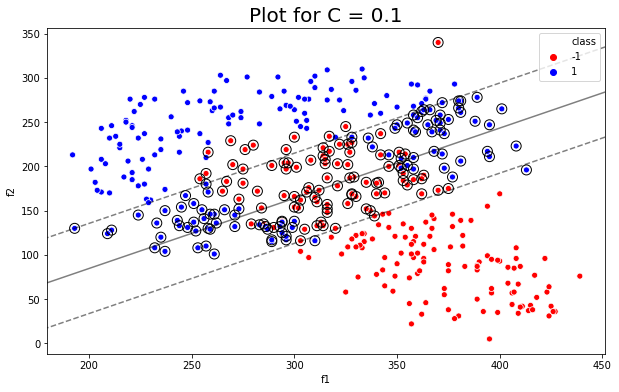

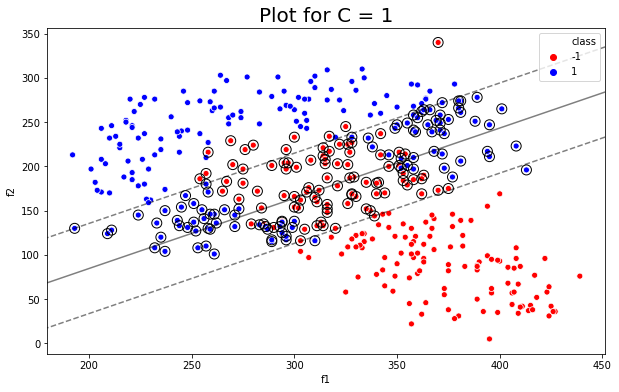

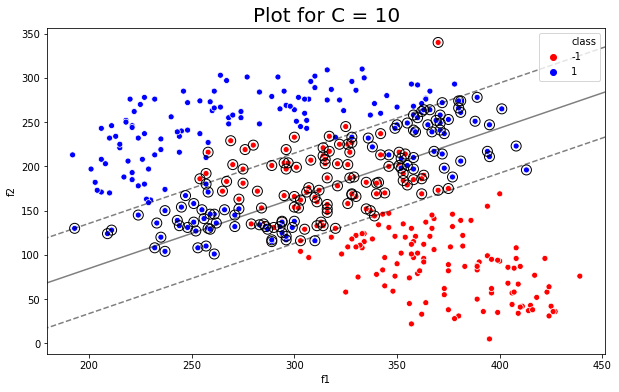

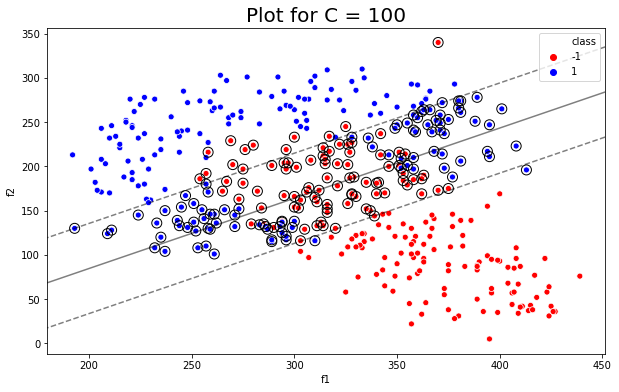

In [3]:
C_val_list = [.1, 1, 10, 100]
X = df[["f1", "f2"]]
Y = df["class"]
temp = 140

for i in C_val_list:
    clf = svm.SVC(kernel='linear', C=i)
    #clf = svm.LinearSVC(C=0.001)
    clf.fit(X, Y)

    fig = plt.figure(figsize=(10,6))
    temp += 1
    plt.subplot()
    sns.scatterplot(x="f1",  data= df, y="f2", hue="class", legend='full', palette= ['r', 'b'])

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)    
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
    plt_title = "Plot for C = " + str(i)
    plt.title(str(plt_title), Fontsize=20)
    fig_name = "plot_for_C_" + str(i) + "dataset1_scatter.jpg"
    plt.savefig(str(fig_name))

plt.show()

Report Accuracy based on 10 times 10 fold cross validation 

In [4]:
C_val_list = [.1, 1, 10, 100]

random_state = 12883
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)
arr = df.to_numpy()

accuracy_vals = []

for i in C_val_list:
    accuracy_vals_for_C =[]
    for train_index, test_index in rkf.split(arr):
        X_train = arr[train_index,:-1]
        Y_train = arr[train_index,-1]
        X_test = arr[test_index,:-1]
        Y_test = arr[test_index,-1]
        clf = svm.SVC(kernel='linear', C=i)
        #clf = svm.LinearSVC(C=0.001)
        clf.fit(X_train, Y_train)
        Y_pred = clf.predict(X_test)
        _accuracy_ = accuracy_score(Y_test, Y_pred)
        #print("Accuracy for C = " + str(i) + " is " + str(_accuracy_))
        accuracy_vals_for_C.append(_accuracy_)
    accuracy_vals.append(accuracy_vals_for_C)

KeyboardInterrupt: 

In [5]:
accuracy_vals

[[0.7711442786069652, 0.78, 0.8109452736318408, 0.765],
 [0.7711442786069652, 0.78, 0.8109452736318408, 0.765],
 [0.7711442786069652, 0.78, 0.8109452736318408, 0.765],
 [0.7711442786069652, 0.78, 0.8109452736318408, 0.765]]

In [10]:
print(len(X))

401


In [91]:
'''
T :-  number of weak learner 
X :-  feature values (df pandas) 
Y :-  label values (df pandas)

End result will be a set of classifiers with their weights 
'''

def ada_boost_m1_train(df_train, T=20):
    clf_count = 0
    NUM_TRAIN_SAMPLES = 20
    C = 1
    weak_clf  = []
    clf_b_t   = []
    accu_list = []

    D_t = np.ones(len(df_train))* (1/len(df_train))
    while clf_count < T:
        df_train = shuffle(df_train)
        X = df_train[["f1", "f2"]]
        Y = df_train["class"]
        X_train = X.iloc[0:NUM_TRAIN_SAMPLES, :]
        Y_train = Y.iloc[0:NUM_TRAIN_SAMPLES]
        X_test = X.iloc[:, :]
        Y_test = Y.iloc[:]
    
        clf = svm.SVC(kernel='linear', gamma='auto', C=C)
        clf.fit(X_train, Y_train)
        Y_pred = clf.predict(X_test)
        Y_err = np.abs(Y_pred - Y_test)/2
        #Y_err = Y_err * D_t
        #e_t = np.sum(Y_err)
        index = Y_err.astype(bool)
        e_t = np.sum(D_t[index])
        if e_t > 0.5:
            continue
        b_t = e_t / (1 - e_t)
        weak_clf.append(clf)
        clf_b_t.append(b_t)
        score = clf.score(X_test, Y_test)
        accu_list.append(score)

        #update distribution
        #D_t = (Y_err + ((1- Y_err)* b_t))*D_t
        #D_t = D_t/(np.sum(D_t))
        D_t[np.invert(index)] *= b_t #if correct prediction then multiply by beta. In our case correct prediction is 0
        D_t = D_t/np.sum(D_t)

        clf_count += 1

    return weak_clf, clf_b_t, accu_list


In [92]:
def ada_boost_m1_predict(X_test, weak_clf, clf_b_t):

    Y_pred = []
    temp = len(weak_clf)
    for i in range (0, temp):
        clf = weak_clf[i]
        y_pred = clf.predict(X_test)
        y_pred = np.log(1/clf_b_t[i])*y_pred
        Y_pred.append(y_pred)
    Y_pred = np.array(Y_pred)
    #print(Y_pred.shape)
    val = np.sum(Y_pred, axis = 0)
    val[val < 0] = -1
    val[val > 0] = 1
    #return Y_pred, np.sum(Y_pred, axis = 0)
    return val

In [7]:
rkf = RepeatedKFold(n_splits=4, n_repeats=1, random_state=278)

for train_index, test_index in rkf.split(data1):
    y_predicted = []
    y_actual    = []
    y_accuracy  = []
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = df.iloc[train_index, :-1], df.iloc[test_index, :-1]
    Y_train, Y_test = df.iloc[train_index, -1], df.iloc[test_index, -1]
    
    weak_clf, clf_b_t = ada_boost_m1_train(df, T=50)
    ada_boost_m1_predict(X_test, weak_clf, clf_b_t)

NameError: name 'data1' is not defined

In [93]:
weak_clf, clf_b_t, accu_list = ada_boost_m1_train(df, T=50)
X = df[["f1", "f2"]]
X_test = X.iloc[0:10, :]
print(accu_list)
#ada_boost_m1_predict(X_test, weak_clf, clf_b_t)

[0.7406483790523691, 0.7456359102244389, 0.7506234413965087, 0.7780548628428927, 0.7805486284289277, 0.7780548628428927, 0.7231920199501247, 0.7655860349127181, 0.7955112219451371, 0.7830423940149626, 0.7755610972568578, 0.743142144638404, 0.7830423940149626, 0.773067331670823, 0.7605985037406484, 0.7406483790523691, 0.800498753117207, 0.8029925187032418, 0.7755610972568578, 0.8029925187032418, 0.7830423940149626, 0.7182044887780549, 0.770573566084788, 0.7905236907730673, 0.7755610972568578, 0.7581047381546134, 0.7780548628428927, 0.7381546134663342, 0.7630922693266833, 0.7980049875311721, 0.7605985037406484, 0.7830423940149626, 0.713216957605985, 0.7381546134663342, 0.7506234413965087, 0.7680798004987531, 0.7805486284289277, 0.800498753117207, 0.7381546134663342, 0.7855361596009975, 0.7655860349127181, 0.7880299251870324, 0.7830423940149626, 0.7755610972568578, 0.7680798004987531, 0.7855361596009975, 0.7805486284289277, 0.7556109725685786, 0.7980049875311721, 0.743142144638404]


In [94]:
def accuracy(Y_actual, Y_predicted):
    accu_arr = (Y_actual == Y_predicted)
    accu_arr = accu_arr.astype(int)
    accu = np.count_nonzero(accu_arr)/len(accu_arr)
    return accu

Y_predicted = ada_boost_m1_predict(X, weak_clf, clf_b_t)
Y_actual = df['class'].values
#print(len(Y_actual))
print(accuracy(Y_actual, Y_predicted))

0.7880299251870324


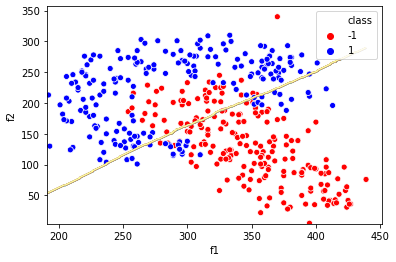

In [83]:
#weak_clf, clf_b_t = ada_boost_m1_train(df)

#C = 1.0  # SVM regularization parameter
#clf = svm.SVC(kernel = 'poly', degree=5, C=1 )
X = df[["f1", "f2"]].values
Y = df["class"].values
clf.fit(X, Y)
sns.scatterplot(x="f1",  data= df, y="f2", hue="class", legend='full', palette= ['r', 'b'])

h = 1 # step size in the mesh
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
#Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = ada_boost_m1_predict(np.c_[xx.ravel(), yy.ravel()],  weak_clf, clf_b_t)
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

In [29]:
print(len(Y_predicted))

401
